In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import re

In [233]:
# Disease probabilities

file_name = "regression_results.txt"
#file_name = "regression_results_cluster_gradients.txt"

with open(file_name, 'r') as f:
    line = f.readline()
    ind = 0

    while True:

        if line.startswith("FIRST"):
            d_line = re.split("[ \t]+", line)
            data_index.append(d_line[0])
            data_col.append(float(d_line[1]))
            
        if line.startswith("Cluster probability:"):
            next_data_cluster_prob = float(line.split(":")[1].strip())
            
        if line.startswith("Disease") or len(line) == 0:

            data_index.append("Cluster probability")
            data_col.append(data_cluster_prob)

            if ind == 1:
                data = pd.DataFrame({"Cluster_1":data_col}, index=data_index)
            elif ind > 1:
                data = pd.merge(
                    data,
                    pd.DataFrame({"Cluster_{}".format(ind):data_col}, index=data_index),
                    left_index=True,
                    right_index=True
                )
            data_col = []
            data_index = []
            data_cluster_prob = next_data_cluster_prob
            next_data_cluster_prob = None
            
            
            ind += 1

            if len(line) == 0:
                break
            
        
        line = f.readline()

data = data.iloc[np.argsort(data.mean(axis=1).to_numpy()), :]

target_row = 'Cluster probability'
idx = [target_row] + [i for i in data.index if i != target_row]
data = data.loc[idx]

In [234]:
data

Cluster_1  Cluster_2  Cluster_3  Cluster_4  \
Cluster probability       0.785946   0.058059   0.038618   0.021437   
FIRST_BL_ANAEMIA          0.000000   0.005000   0.000000   0.003000   
FIRST_PSYCHOSES           0.001000   0.001000   0.001000   0.006000   
FIRST_DRUG_ABUSE          0.000000   0.002000   0.001000   0.004000   
FIRST_PEP_ULCER           0.000000   0.038000   0.012000   0.026000   
FIRST_HYPERTENSION_COMP   0.000000   0.001000   0.003000   0.008000   
FIRST_COAGULOPATHY        0.000000   0.008000   0.003000   0.012000   
FIRST_PCD                 0.001000   0.019000   0.009000   0.090000   
FIRST_LYMPHOMA            0.000000   0.011000   0.006000   0.014000   
FIRST_RA                  0.000000   0.053000   0.029000   0.048000   
FIRST_LIVER_DISEASE       0.001000   0.032000   0.013000   0.029000   
FIRST_PARALYSIS           0.000000   0.002000   0.008000   0.024000   
FIRST_DIAB_COMP           0.000000   0.001000   0.002000   0.001000   
FIRST_HYPOTHYROIDISM      0.002000   0.117000   0.061000   0.083000   
FIRST_PVD                 0.001000   0.024000   0.054000   0.143000   
FIRST_WEIGHT_LOSS         0.001000   0.085000   0.011000   0.064000   
FIRST_VALVULAR_DISEASE    0.000000   0.014000   0.041000   0.384000   
FIRST_DEF_ANAEMIA         0.001000   0.123000   0.032000   0.116000   
FIRST_OBESITY             0.001000   0.137000   0.111000   0.103000   
FIRST_CHF                 0.000000   0.004000   0.020000   0.535000   
FIRST_METASTATIC_CANCER   0.000000   0.001000   0.001000   0.007000   
FIRST_RENAL_DISEASE       0.000000   0.034000   0.100000   0.137000   
FIRST_OND                 0.001000   0.034000   0.061000   0.199000   
FIRST_DEPRESSION          0.001000   0.242000   0.084000   0.120000   
FIRST_FED                 0.000000   0.043000   0.042000   0.212000   
FIRST_DIAB                0.001000   0.095000   0.149000   0.129000   
FIRST_CPD                 0.005000   0.248000   0.142000   0.291000   
FIRST_ARRYTHMIA           0.003000   0.094000   0.129000   0.710000   
FIRST_CANCER              0.005000   0.186000   0.164000   0.149000   
FIRST_HYPERTENSION        0.004000   0.304000   0.970000   0.635000   

                         Cluster_5  Cluster_6  Cluster_7  Cluster_8  \
Cluster probability       0.019174   0.013986      0.012   0.011954   
FIRST_BL_ANAEMIA          0.002000   0.001000      0.006   0.003000   
FIRST_PSYCHOSES           0.004000   0.010000      0.051   0.025000   
FIRST_DRUG_ABUSE          0.004000   0.006000      0.042   0.008000   
FIRST_PEP_ULCER           0.019000   0.029000      0.044   0.031000   
FIRST_HYPERTENSION_COMP   0.000000   0.002000      0.005   0.002000   
FIRST_COAGULOPATHY        0.005000   0.009000      0.008   0.018000   
FIRST_PCD                 0.066000   0.015000      0.042   0.030000   
FIRST_LYMPHOMA            0.007000   0.009000      0.033   0.004000   
FIRST_RA                  0.019000   0.041000      0.015   0.043000   
FIRST_LIVER_DISEASE       0.037000   0.056000      0.051   0.034000   
FIRST_PARALYSIS           0.017000   0.012000      0.029   0.165000   
FIRST_DIAB_COMP           0.000000   0.445000      0.016   0.002000   
FIRST_HYPOTHYROIDISM      0.049000   0.080000      0.016   0.067000   
FIRST_PVD                 0.034000   0.071000      0.019   0.077000   
FIRST_WEIGHT_LOSS         0.089000   0.065000      0.097   0.113000   
FIRST_VALVULAR_DISEASE    0.010000   0.028000      0.044   0.044000   
FIRST_DEF_ANAEMIA         0.061000   0.094000      0.044   0.104000   
FIRST_OBESITY             0.042000   0.310000      0.038   0.058000   
FIRST_CHF                 0.012000   0.032000      0.010   0.024000   
FIRST_METASTATIC_CANCER   0.897000   0.013000      0.039   0.006000   
FIRST_RENAL_DISEASE       0.043000   0.120000      0.064   0.135000   
FIRST_OND                 0.061000   0.113000      0.092   0.886000   
FIRST_DEPRESSION          0.120000   0.238000      0.187   0.242000   
FIRST_FED                 0.125000   0.062000   

In [258]:
# Odds

coefs = {"variable": [], "mean": [], "lci": [], "uci": []}
cluster_coefs = {"variable": [], "mean": [], "lci": [], "uci": [], "cluster":[]}
intercepts = {"value":[], "lci": [], "uci":[]}
individual_counts = []

get_coefs = False
get_cluster_coefs = False
cluster_index = 1

with open(file_name, 'r') as f:
    line = f.readline()
    
    while(line):
        line = f.readline()
        
        if get_coefs:
            l_data = re.split("[ \t]+", line)

            if l_data[0] != "" and l_data[0] != "\n":
                coefs["variable"].append(l_data[0])
                coefs["mean"].append(float(l_data[1]))
                coefs["lci"].append(float(l_data[3]))
                coefs["uci"].append(float(l_data[4]))
            
            if line.strip() == "":
                get_coefs=False
                
        if line.startswith("Global regression coefficients"):
            get_coefs = True


        if get_cluster_coefs:
            l_data = re.split("[ \t]+", line)
            if l_data[0] != "" and l_data[0] != "\n":
                cluster_coefs["variable"].append(l_data[0])
                cluster_coefs["mean"].append(float(l_data[1]))
                cluster_coefs["lci"].append(float(l_data[3]))
                cluster_coefs["uci"].append(float(l_data[4]))
                cluster_coefs["cluster"].append("Cluster_{}".format(cluster_index))
                
            if line.strip() == "":
                get_cluster_coefs=False
                cluster_index += 1
        
        if line.startswith("Cluster coefficients:"):
            get_cluster_coefs = True
        
        if line.startswith("intercepts"):
            l_data = re.split("[ \t]+", line)
            intercepts["value"].append(float(l_data[1]))
            intercepts["lci"].append(float(l_data[3]))
            intercepts["uci"].append(float(l_data[4]))

        if line.startswith("Estimated cluster individuals:"):
            individual_counts.append(float(line.split(":")[1]))

coefs = pd.DataFrame(coefs).set_index("variable")
cluster_coefs = pd.DataFrame(cluster_coefs)
ind = ["Cluster_{}".format(i) for i in pd.DataFrame(intercepts).index + 1]
intercepts = pd.DataFrame(intercepts)
intercepts.index = ind

In [262]:
np.round(individual_counts)

array([1018950.,   75271.,   50067.,   27793.,   24858.,   18132.,
         15558.,   15497.,   10721.,    7422.,    7196.,    6990.,
          6393.,    5290.,    5124.,    1201.])

In [236]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [237]:
cluster_coefs

Empty DataFrame
Columns: [variable, mean, lci, uci, cluster]
Index: []

In [154]:
coefs["exp(mean)"] = np.exp(coefs["mean"])
coefs["exp(lci)"] = np.exp(coefs["lci"])
coefs["exp(uci)"] = np.exp(coefs["uci"])

In [157]:
coefs.round(2)

mean   lci   uci  exp(mean)  exp(lci)  exp(uci)
variable                                                                  
alpha                      1.20  0.85  1.59       3.33      2.34      4.89
AGE_AT_START               0.12  0.11  0.14       1.13      1.12      1.15
GNDR_CD                   -0.46 -0.54 -0.38       0.63      0.58      0.68
WIMD_QUINTILE_INCEPTION_1  0.33  0.26  0.40       1.39      1.30      1.50
WIMD_QUINTILE_INCEPTION_2  0.18  0.10  0.24       1.19      1.11      1.27
WIMD_QUINTILE_INCEPTION_4 -0.14 -0.22 -0.06       0.87      0.80      0.94
WIMD_QUINTILE_INCEPTION_5 -0.35 -0.44 -0.26       0.71      0.64      0.77

In [70]:
if file_name == "regression_results.txt":
    data.loc["Mortality (male)", :] = logistic(
        intercepts["value"] #+ coefs.loc["WIMD_QUINTILE_INCEPTION_3", "mean"]
    )
    data.loc["Mortality (female)", :] = logistic(
        intercepts["value"] #+ coefs.loc["WIMD_QUINTILE_INCEPTION_3", "mean"] 
        + coefs.loc["GNDR_CD", "mean"]
    )
elif file_name == "regression_results_cluster_gradients.txt":
    data.loc["Mortality (male)", :] = logistic(
        intercepts["value"] 
        #+ cluster_coefs.loc[cluster_coefs["variable"] == "WIMD_QUINTILE_INCEPTION_3", ["mean", "cluster"]].set_index("cluster")["mean"]
    )

    data.loc["Mortality (female)", :] = logistic(
        intercepts["value"] 
        #+ cluster_coefs.loc[cluster_coefs["variable"] == "WIMD_QUINTILE_INCEPTION_3", ["mean", "cluster"]].set_index("cluster")["mean"]
        + cluster_coefs.loc[cluster_coefs["variable"] == "GNDR_CD", ["mean", "cluster"]].set_index("cluster")["mean"]
    )

In [71]:
mapping = {
    "FIRST_CPD": "COPD",
    "FIRST_CANCER": "Cancer",
    "FIRST_HYPERTENSION": "Hypertension",
    "FIRST_DEPRESSION": "Depression",
    "FIRST_ARRYTHMIA": "Arrythmia",
    "FIRST_HYPOTHYROIDISM": "Hypothyroidism",
    "FIRST_OND": "Other neurological disorder",
    "FIRST_PSYCHOSES": "Psychosis",
    "FIRST_RENAL_DISEASE": "Renal failure",
    "FIRST_LIVER_DISEASE": "Liver disease",
    "FIRST_PARALYSIS": "Paralysis",
    "FIRST_METASTATIC_CANCER": "Metastatic cancer",
    "FIRST_LYMPHOMA": "Lymphoma",
    "FIRST_FED": "Fluid & electrolyte disorders",
    "FIRST_PCD": "Pulmonary ciculation disorders",
    "FIRST_DRUG_ABUSE": "Drug abuse",
    "FIRST_DEF_ANAEMIA": "Deficiency anaemia",
    "FIRST_VALVULAR_DISEASE": "Valvular disease",
    "FIRST_PEP_ULCER": "Peptic ulcer",
    "FIRST_PVD": "Peripheral vascular disease",
    "FIRST_RA": "Rheumatoid arthritis",
    "FIRST_WEIGHT_LOSS": "Weight loss",
    "FIRST_OBESITY": "Obesity",
    "FIRST_DIAB": "Diabetes",
    "FIRST_DIAB_COMP": "Diabetes with complication",
    "FIRST_CHF": "Congestive heart failure",
    "FIRST_HYPERTENSION_COMP": "Hypertension with complication",
    "FIRST_COAGULOPATHY": "Coagulopathy",
    "FIRST_BL_ANAEMIA": "Blood loss anaemia"
}

In [113]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale, so we see both hump and spike. A linear
# scale only shows the spike.
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

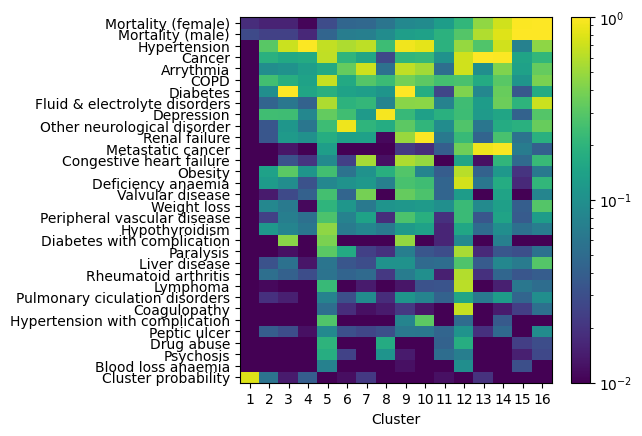

In [147]:
l_n = 6.5
fig, ax = plt.subplots(figsize=(l_n, l_n * 11/16))

locs = data.loc[["Mortality (male)", "Mortality (female)"]].mean(axis=0).argsort().to_numpy()
wrong_place = locs == 0
locs[wrong_place] = locs[0]
locs[0] = 0

colour_offset = 1e-2

c = ax.pcolor(
    data
        .iloc[:, locs]
        .rename(index=mapping),
    norm=colors.LogNorm(vmin=colour_offset, vmax=1.0, clip=True)
)

ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)

ax.set_yticklabels(data.rename(index=mapping).index)
ax.set_xticklabels(np.arange(data.shape[1]).astype(int) + 1)

fig.colorbar(c, ax=ax)
plt.xlabel("Cluster")
plt.tight_layout()
plt.savefig("SAIL_probability_heatmap_logscale.png", dpi=300)
plt.show()

In [256]:
intercepts = intercepts.iloc[locs]
intercepts["baseline_risk"] = logistic(intercepts["value"])
intercepts["baseline_risk_lci"] = logistic(intercepts["lci"])
intercepts["baseline_risk_uci"] = logistic(intercepts["uci"])

intercepts["out_string"] = intercepts.round(2).apply(lambda x: "{} ({}, {})".format(x[0], x[1], x[2]), axis=1)
intercepts["out_string_br"] = intercepts.round(3).apply(lambda x: "{} ({}, {})".format(x[3], x[4], x[5]), axis=1)
intercepts["labels"] = ["Cluster {}".format(i) for i in range(1, len(intercepts.index) + 1)]

/var/folders/ks/ncxs3qhx1vzcmdxqxhq0wpsh0000gn/T/ipykernel_11266/1407064659.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercepts["out_string"] = intercepts.round(2).apply(lambda x: "{} ({}, {})".format(x[0], x[1], x[2]), axis=1)
/var/folders/ks/ncxs3qhx1vzcmdxqxhq0wpsh0000gn/T/ipykernel_11266/1407064659.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercepts["out_string_br"] = intercepts.round(3).apply(lambda x: "{} ({}, {})".format(x[3], x[4], x[5]), axis=1)


In [257]:
print(
    intercepts
        .set_index("labels")
        .loc[:, ["out_string", "out_string_br"]]
        .to_latex()
)

\begin{tabular}{lll}
\toprule
 & out_string & out_string_br \\
labels &  &  \\
\midrule
Cluster 1 & -3.55 (-3.62, -3.49) & 0.028 (0.026, 0.029) \\
Cluster 2 & -3.68 (-3.8, -3.56) & 0.025 (0.022, 0.028) \\
Cluster 3 & -3.68 (-3.79, -3.55) & 0.025 (0.022, 0.028) \\
Cluster 4 & -4.07 (-4.17, -3.96) & 0.017 (0.015, 0.019) \\
Cluster 5 & -3.07 (-3.26, -2.87) & 0.044 (0.037, 0.054) \\
Cluster 6 & -2.6 (-2.69, -2.51) & 0.069 (0.064, 0.075) \\
Cluster 7 & -2.55 (-2.62, -2.48) & 0.072 (0.068, 0.077) \\
Cluster 8 & -2.29 (-2.42, -2.15) & 0.092 (0.082, 0.104) \\
Cluster 9 & -1.91 (-2.0, -1.81) & 0.129 (0.119, 0.141) \\
Cluster 10 & -1.85 (-2.29, -1.42) & 0.136 (0.092, 0.195) \\
Cluster 11 & -1.46 (-1.69, -1.17) & 0.189 (0.156, 0.238) \\
Cluster 12 & -0.88 (-1.37, -0.4) & 0.292 (0.202, 0.402) \\
Cluster 13 & 0.32 (0.26, 0.39) & 0.58 (0.566, 0.596) \\
Cluster 14 & 1.41 (-0.25, 3.16) & 0.804 (0.437, 0.959) \\
Cluster 15 & 4.4 (4.2, 4.59) & 0.988 (0.985, 0.99) \\
Cluster 16 & 8.42 (7.13, 9.58) & 1.0 

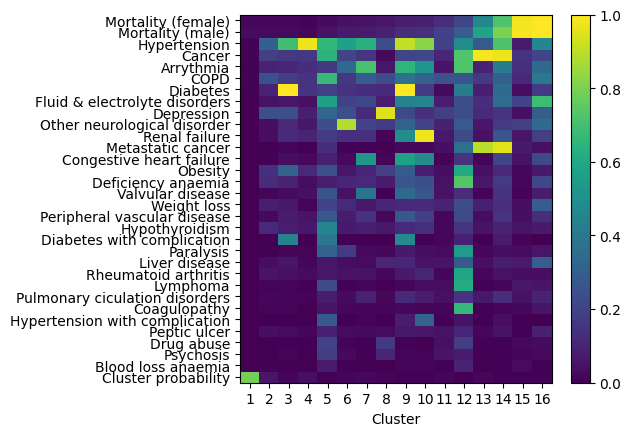

In [148]:
l_n = 6.5
fig, ax = plt.subplots(figsize=(l_n, l_n * 11/16))


locs = data.loc[["Mortality (male)", "Mortality (female)"]].mean(axis=0).argsort().to_numpy()
wrong_place = locs == 0
locs[wrong_place] = locs[0]
locs[0] = 0

c = ax.pcolor(
    data
        .iloc[:, locs]
        .rename(index=mapping)
)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)

ax.set_yticklabels(data.rename(index=mapping).index)
ax.set_xticklabels(np.arange(data.shape[1]).astype(int) + 1)

fig.colorbar(c, ax=ax)
plt.xlabel("Cluster")
plt.tight_layout()


plt.savefig("SAIL_probability_heatmap.png", dpi=300)

plt.show()

In [74]:
data.rename(index=mapping).to_csv("pcolor_data.csv")

# Table 1

In [288]:
n = 1296463

In [289]:
df_d = pd.read_csv("discrete_model_summary.csv")

In [290]:
df_d["Count"] = (df_d["Mean"] * n).astype(int)
df_d.Mean = df_d.Mean.round(4)

In [291]:
print(df_d.rename(columns={"Unnamed: 0": "disease"}).sort_values(by="Mean", ascending=False).set_index("disease").rename(index=mapping).to_latex())

\begin{tabular}{lrr}
\toprule
 & Mean & Count \\
disease &  &  \\
\midrule
Hypertension & 0.114800 & 148781 \\
Cancer & 0.059800 & 77483 \\
COPD & 0.050600 & 65566 \\
Arrythmia & 0.047200 & 61173 \\
Depression & 0.043800 & 56840 \\
Diabetes & 0.041900 & 54368 \\
Other neurological disorder & 0.031900 & 41392 \\
Fluid & electrolyte disorders & 0.027700 & 35925 \\
Obesity & 0.025800 & 33386 \\
Metastatic cancer & 0.024600 & 31849 \\
Renal failure & 0.024400 & 31649 \\
Congestive heart failure & 0.021900 & 28378 \\
Deficiency anaemia & 0.021500 & 27814 \\
Hypothyroidism & 0.018600 & 24101 \\
Weight loss & 0.017200 & 22300 \\
Valvular disease & 0.016900 & 21940 \\
Peripheral vascular disease & 0.014100 & 18270 \\
Liver disease & 0.010000 & 12936 \\
Diabetes with complication & 0.009200 & 11888 \\
Pulmonary ciculation disorders & 0.008700 & 11246 \\
Rheumatoid arthritis & 0.008700 & 11307 \\
Peptic ulcer & 0.007000 & 9017 \\
Paralysis & 0.005300 & 6919 \\
Lymphoma & 0.003300 & 4318 \\
Hyper

In [326]:
df_r = pd.read_csv("response_model_summary.csv")

In [327]:
df_r = df_r[df_r.notnull().any(axis=1)]
df_r = df_r.iloc[1:]
df_r["1296463"] = df_r["1296463"].astype(float)
df_r.loc[5, "1296463"] = df_r.loc[5, "1296463"] - 1

In [328]:
df_r

N    1296463   Unnamed: 2 Unnamed: 3 Unnamed: 4  \
4               AGE_AT_START  42.511559  15.95128129         40         30   
5                    GNDR_CD   0.487058  0.499832676          1          1   
6  WIMD_QUINTILE_INCEPTION_1   0.179907   0.38411027          0          0   
7  WIMD_QUINTILE_INCEPTION_2   0.195271   0.39640896          0          0   
8  WIMD_QUINTILE_INCEPTION_4   0.207853  0.405771342          0          0   
9  WIMD_QUINTILE_INCEPTION_5   0.213101  0.409498284          0          0   

  Unnamed: 5  
4         52  
5          2  
6          0  
7          0  
8          0  
9          0

In [329]:
df_r["Count"] = df_r["1296463"] * n

In [330]:
df_r[["N", "Count"]].round(0).astype(str)

N       Count
4               AGE_AT_START  55114663.0
5                    GNDR_CD    631453.0
6  WIMD_QUINTILE_INCEPTION_1    233243.0
7  WIMD_QUINTILE_INCEPTION_2    253161.0
8  WIMD_QUINTILE_INCEPTION_4    269474.0
9  WIMD_QUINTILE_INCEPTION_5    276277.0

In [337]:
n - df_r.loc[6:, "Count"].round().sum()

264308.0